In [ ]:
%config Completer.use_jedi = False
%config IPCompleter.greedy=True

In [2]:
!pip install geocoder

     |████████████████████████████████| 98 kB 3.7 MB/s 


In [3]:
import tweepy
import os
import numpy as np
import matplotlib.pyplot as plt
import json
import sys
import geocoder
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [4]:
consumer_key = "b5vvACInTiIQlL5Rygxq51rFP"
consumer_secret = "XsChwSSw88AXLB2dTOBAY0FcPyi2Ts4Cph5HIwPqEWZk1Rgqy6"
access_token = '1188456148883529728-dC9cY0fPs5JyV70QgRPBJrdd9VSHrH'
access_token_secret = '00VfZgu8WHDZlCNHGPKhnIrSUcIG0how0BJktMPJNrxYN'
callback_uri = 'oob'

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [7]:
available_loc = api.trends_available()
available_loc

[{'country': '',
  'countryCode': None,
  'name': 'Worldwide',
  'parentid': 0,
  'placeType': {'code': 19, 'name': 'Supername'},
  'url': 'http://where.yahooapis.com/v1/place/1',
  'woeid': 1},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Winnipeg',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/2972',
  'woeid': 2972},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Ottawa',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3369',
  'woeid': 3369},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Quebec',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3444',
  'woeid': 3444},
 {'country': 'Canada',
  'countryCode': 'CA',
  'name': 'Montreal',
  'parentid': 23424775,
  'placeType': {'code': 7, 'name': 'Town'},
  'url': 'http://where.yahooapis.com/v1/place/3534',

In [ ]:
for code in available_loc:
    print(code['country'])


Canada
Canada
Canada
Canada
Canada
Canada
Canada
Canada
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
United Kingdom
Dominican Republic
Guatemala
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Mexico
Argentina
Chile
Chile
Chile
Colombia
Colombia
Colombia
Colombia
Ecuador
Ecuador
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Venezuela
Peru
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Argentina
Argentina
Venezuela
Venezuela
Argentina
Poland
Poland
Poland
Poland
Poland
Poland
Austria
Ire

In [8]:
def getWOEIDCode(country, available_loc):
    for code in available_loc:
        if code['country'] == country:
            return code['parentid']

In [9]:
getWOEIDCode('Germany', available_loc)

23424829

In [10]:
def getTrendString(woeid, api):
    trends = api.trends_place(woeid)
    words = [trend['name'] for trend in trends[0]['trends']]
    gen_string = " ".join(x if x[0]!='#' else x[1:] for x in words)
    return gen_string

In [12]:
getTrendString('23424829', api)

'WSMDS Lanz laschetlasset Klimaschutzministerium Fleets Vetorecht STIKO apfelstrudel Lukaku Cuomo Lakers Hände in den Taschen Angel Jackie B heil redefreiheit obduktionen von geimpften Demonstranten Quizduell ressorts Schauspieler Gesetze Probezeit JuLis schönen dienstag bratwurst Wilbur Shirin Gastrecht klimapaket abkommen Frühjahr 2022 Sabitzer Weltrekord oderbruch Whitemoney Arin PayPal Vielfalts- und Teilhabepolitik Führungskraft Richtlinienkompetenz Melo mertens Schirm Holocaustleugnung start in die woche Joko Mahmoud Diktatur Pult'

In [13]:
for code in available_loc:
    if code['name'] == '23424977':
        print(code['woeid'])

In [53]:
!mkdir savedImages

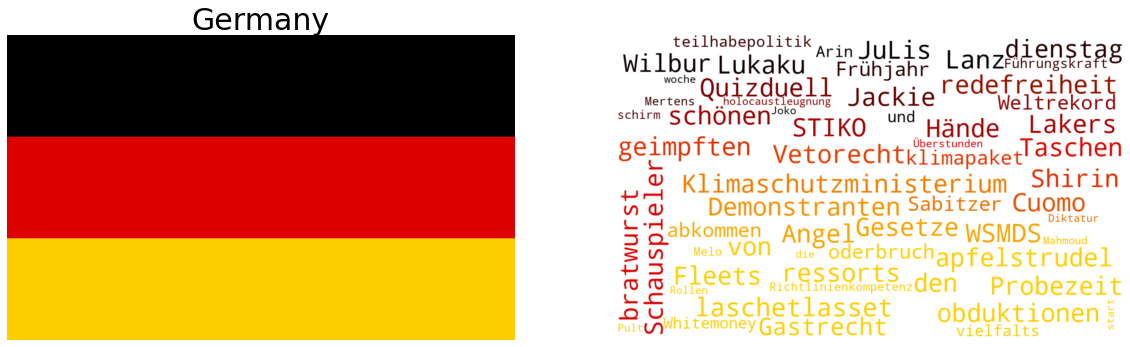

In [55]:
mask = np.array(Image.open("Germany.png").convert('RGB'))

wordcloud = WordCloud(width=1600, height=800, max_font_size=60, background_color="white", mode="RGBA", max_words=2000, mask=mask).generate(getTrendString('23424829', api))

# create coloring from image
image_colors = ImageColorGenerator(mask)
fig = plt.figure(figsize=(20,10), facecolor='w')
plt.subplot(1,2,2)
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.subplot(1,2,1)
plt.imshow(mask)
plt.axis("off")
plt.title("Germany", fontsize=30)
plt.show()

In [56]:
def showTrendingTweetsInCountry(country, api):
    
    mask = np.array(Image.open(f"{country}.png").convert('RGB'))
    country_woeid = getWOEIDCode(country, available_loc)
    country_trends_string = getTrendString(country_woeid, api)
    
    wordcloud = WordCloud(width=1600, height=800, max_font_size=60, background_color="white", mode="RGBA", max_words=2000, mask=mask).generate(country_trends_string)

    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=(20,10), facecolor='w')
    plt.subplot(1,2,2)
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.subplot(1,2,1)
    plt.imshow(mask)
    plt.axis("off")
    plt.title(f"{country}", fontsize=30)
    plt.savefig(f"savedImages/{country}-Trending-Topics.png")
    plt.show()

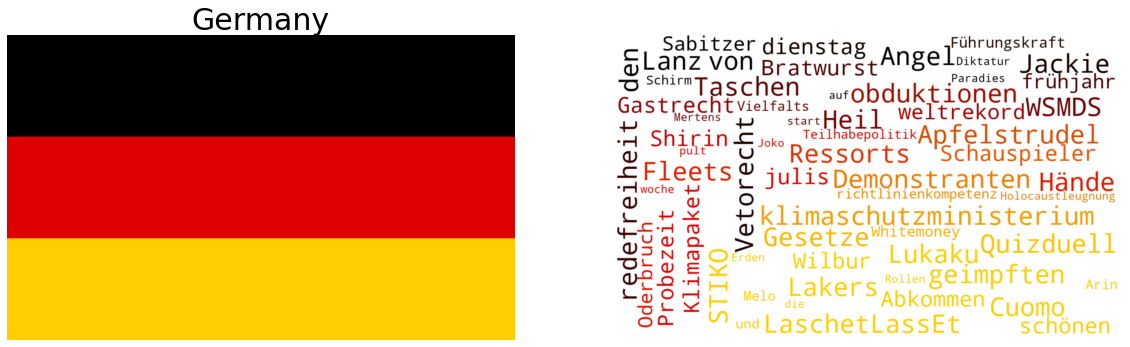

In [57]:
showTrendingTweetsInCountry('Germany', api)

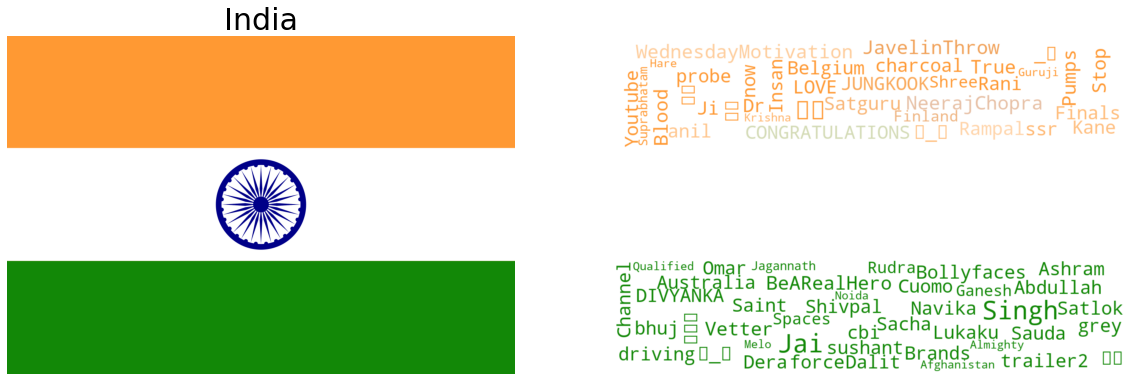

In [58]:
showTrendingTweetsInCountry('India', api)

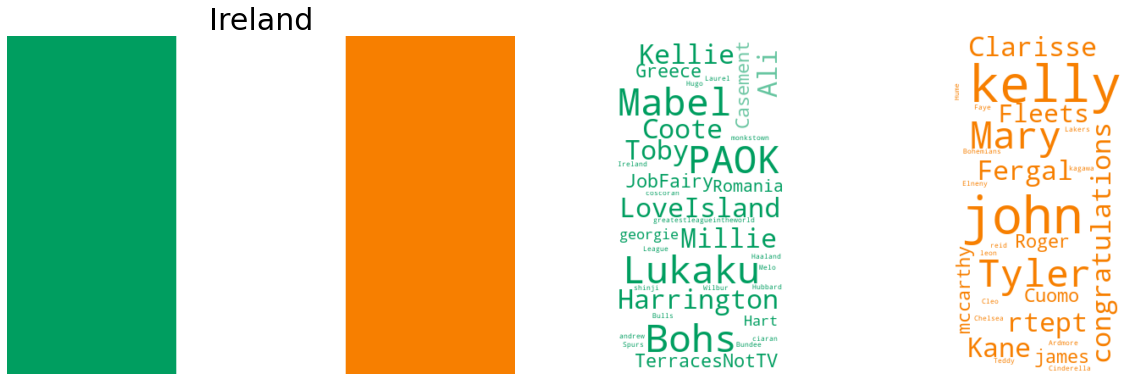

In [59]:
showTrendingTweetsInCountry('Ireland', api)

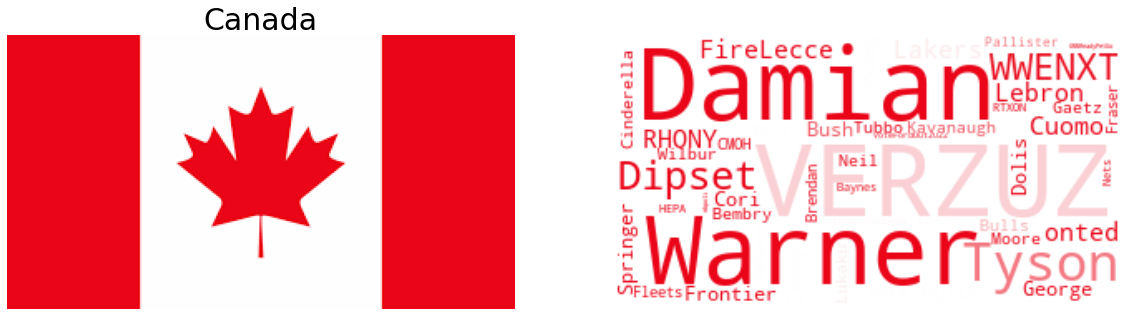

In [60]:
showTrendingTweetsInCountry('Canada', api)

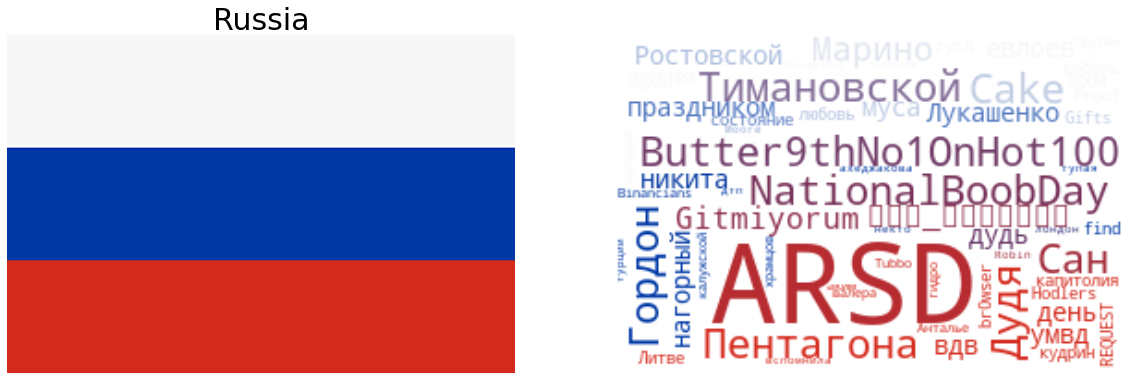

In [61]:
showTrendingTweetsInCountry('Russia', api)

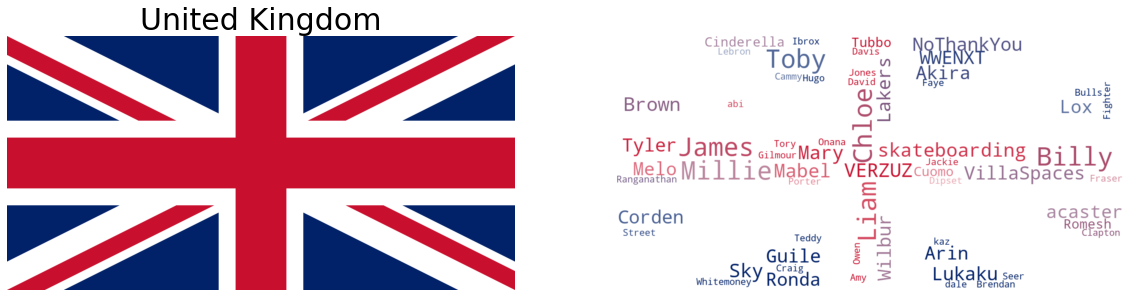

In [62]:
showTrendingTweetsInCountry('United Kingdom', api)

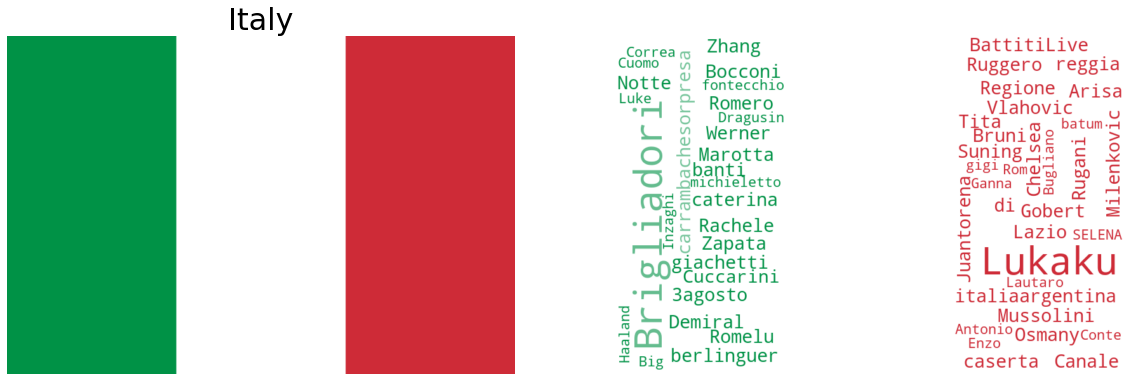

In [63]:
showTrendingTweetsInCountry('Italy', api)

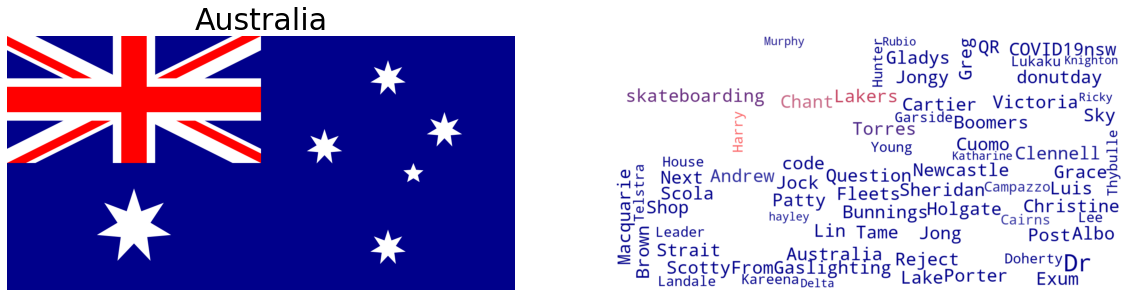

In [64]:
showTrendingTweetsInCountry('Australia', api)

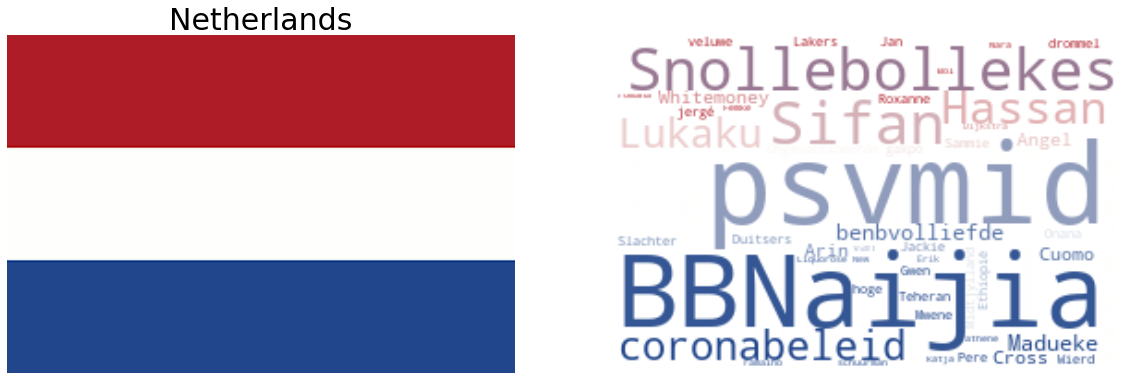

In [65]:
showTrendingTweetsInCountry('Netherlands', api)

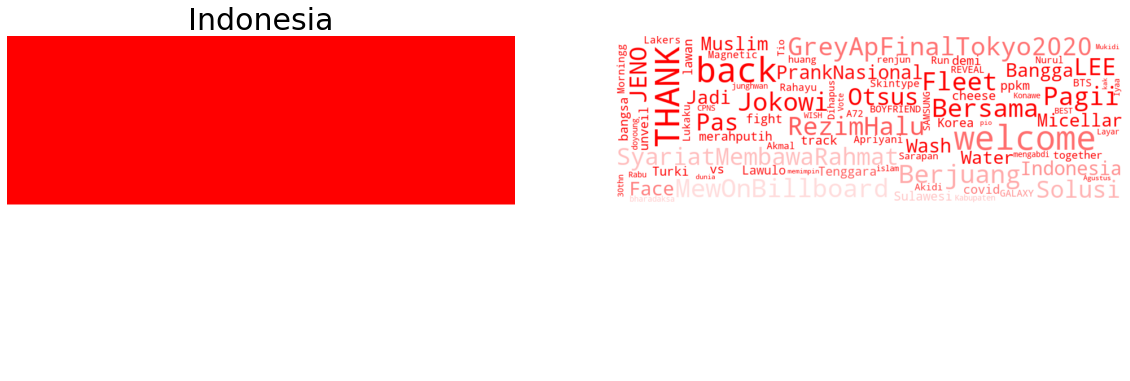

In [66]:
showTrendingTweetsInCountry('Indonesia', api)

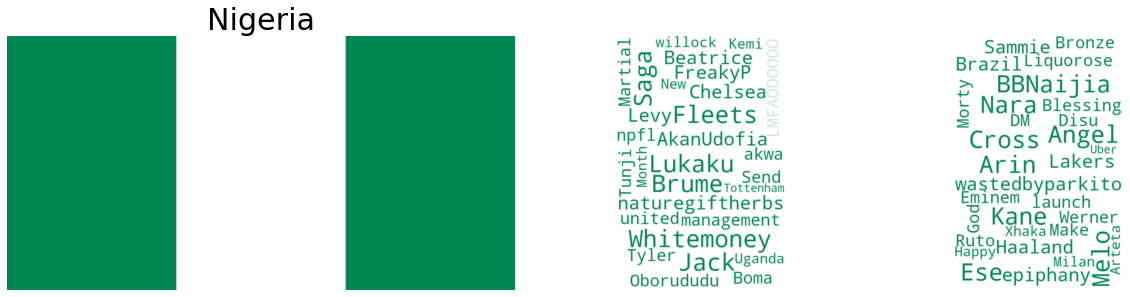

In [67]:
showTrendingTweetsInCountry('Nigeria', api)

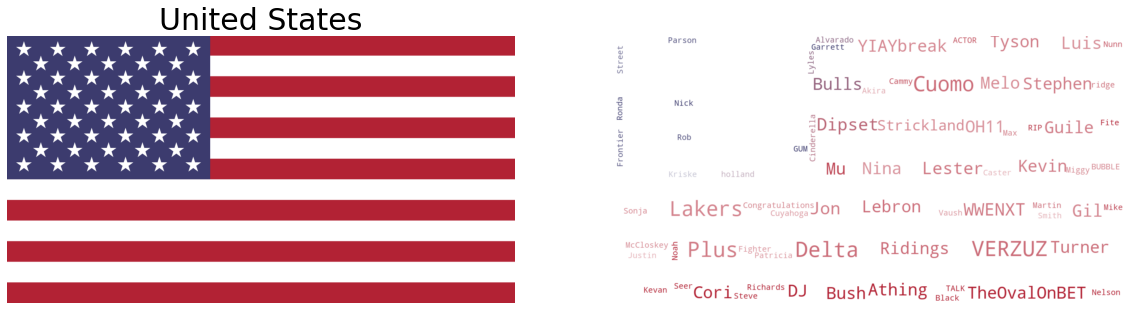

In [68]:
showTrendingTweetsInCountry('United States', api)

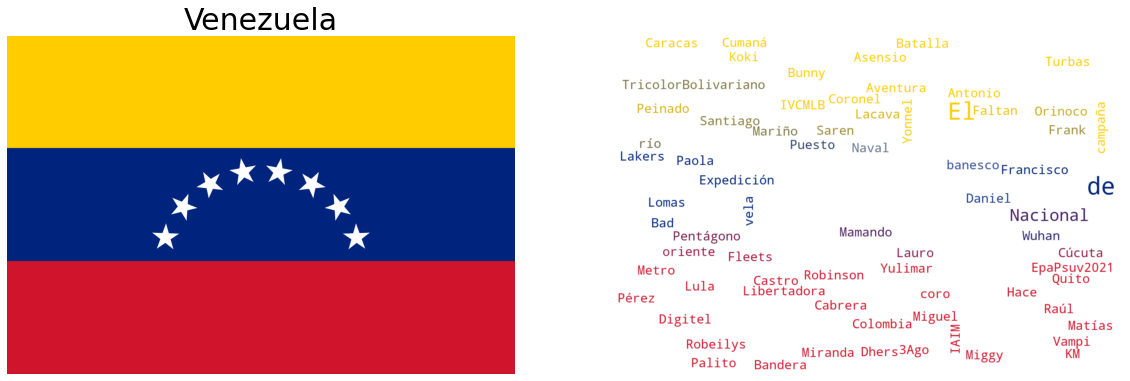

In [69]:
showTrendingTweetsInCountry('Venezuela', api)

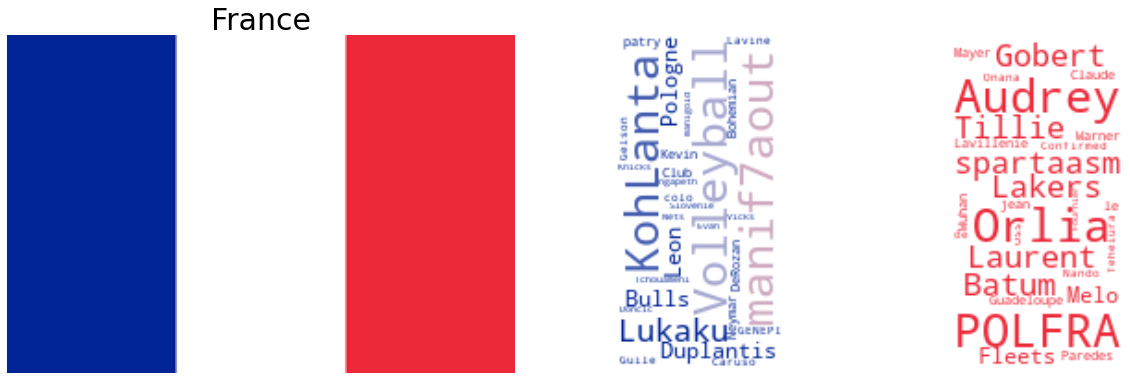

In [70]:
showTrendingTweetsInCountry('France', api)

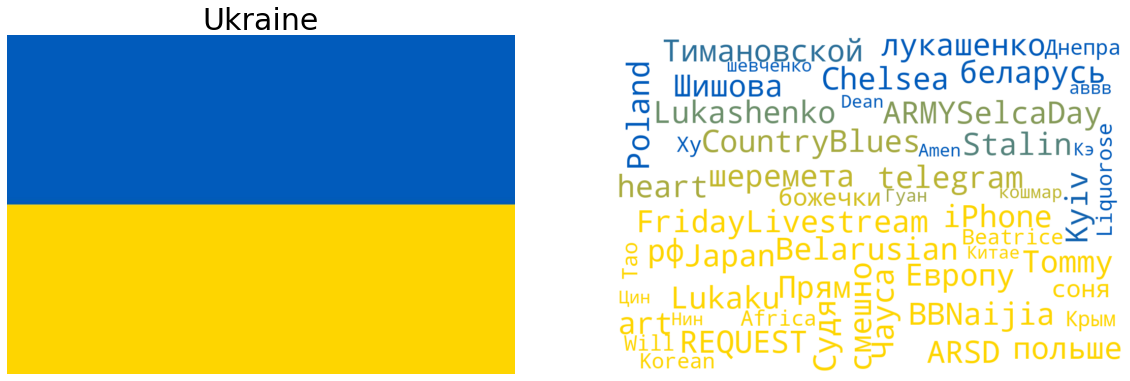

In [71]:
showTrendingTweetsInCountry('Ukraine', api)

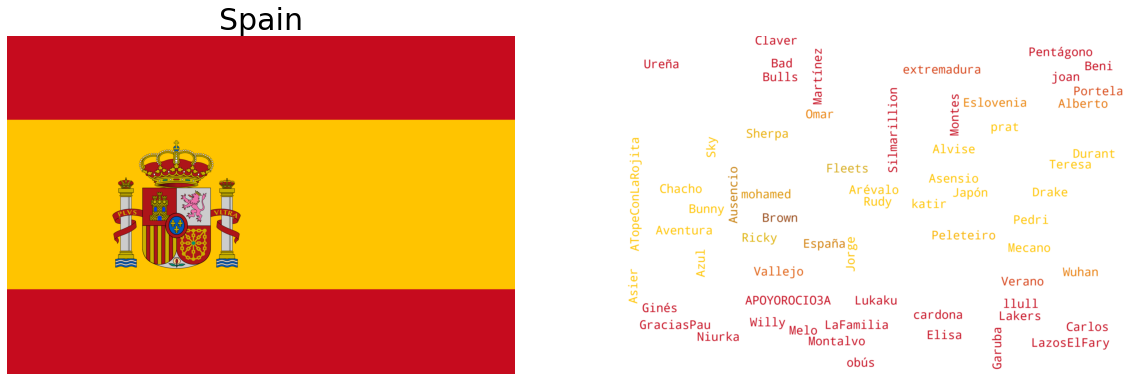

In [72]:
showTrendingTweetsInCountry('Spain', api)

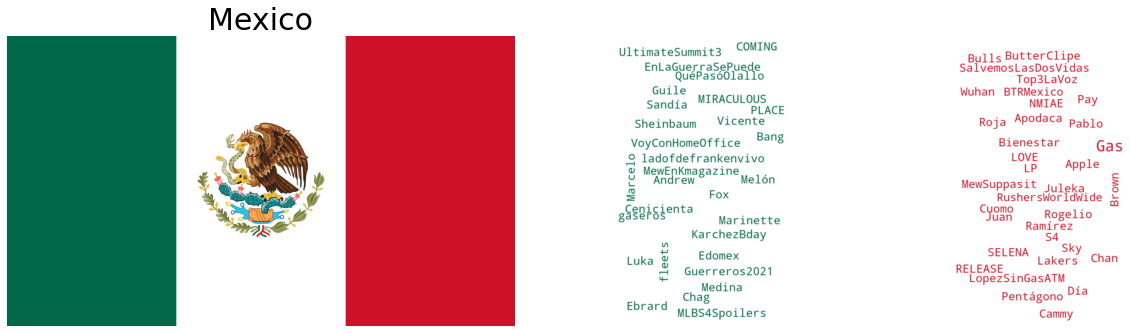

In [73]:
showTrendingTweetsInCountry('Mexico', api)

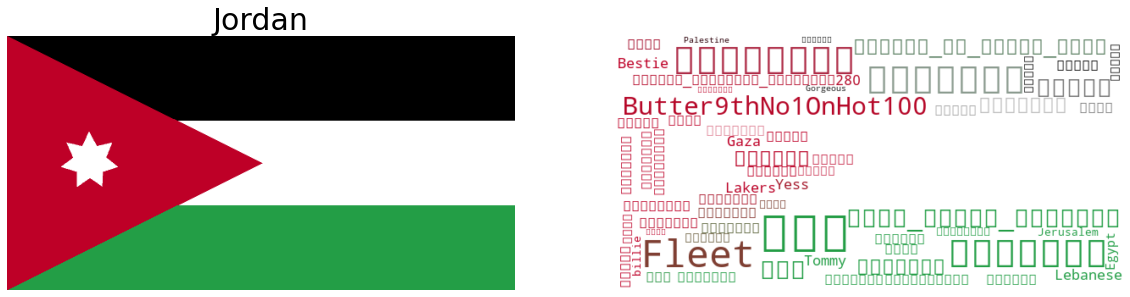

In [74]:
showTrendingTweetsInCountry('Jordan', api)

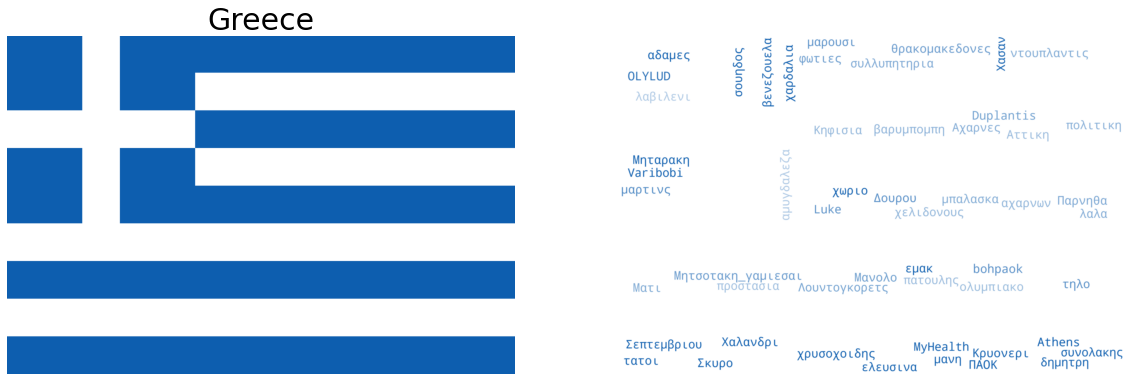

In [75]:
showTrendingTweetsInCountry('Greece', api)

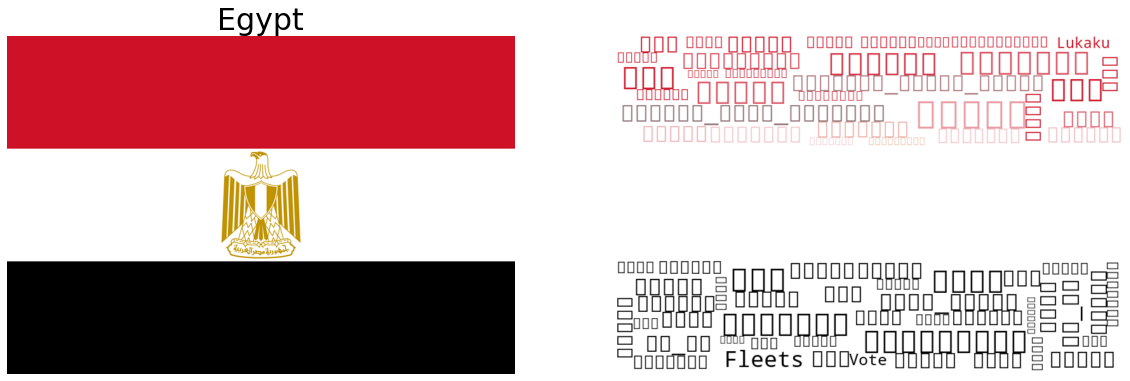

In [76]:
showTrendingTweetsInCountry('Egypt', api)

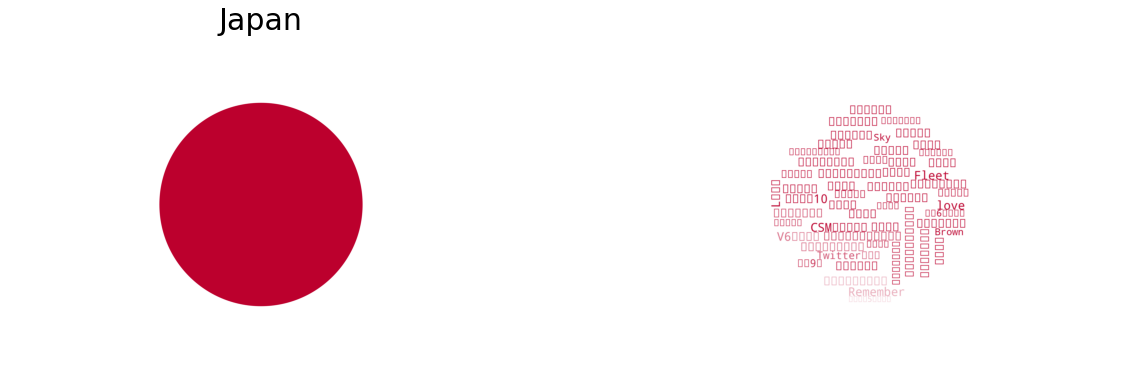

In [77]:
showTrendingTweetsInCountry('Japan', api)

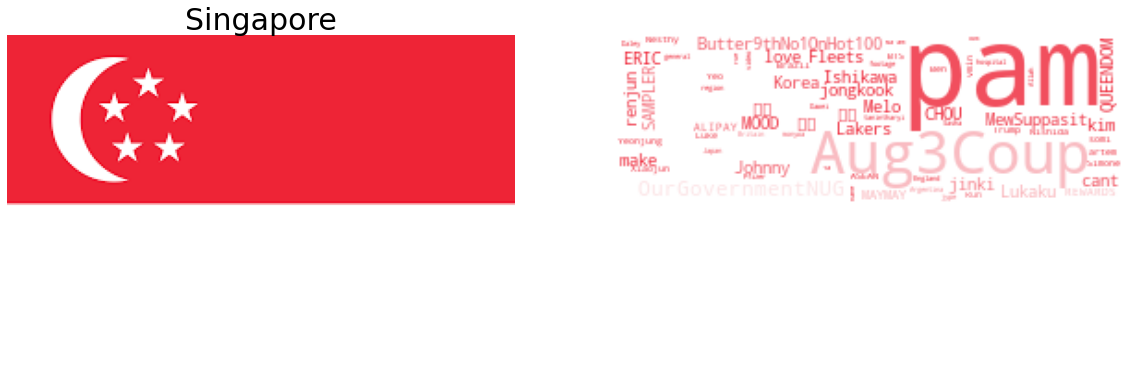

In [78]:
showTrendingTweetsInCountry('Singapore', api)

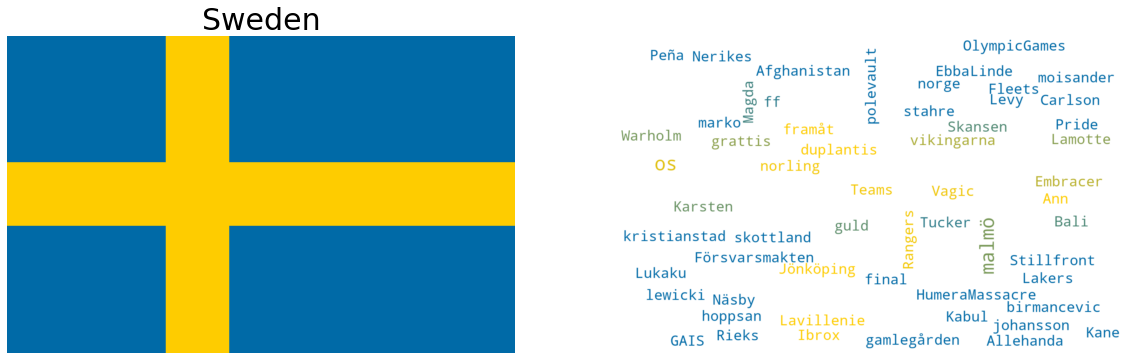

In [79]:
showTrendingTweetsInCountry('Sweden', api)

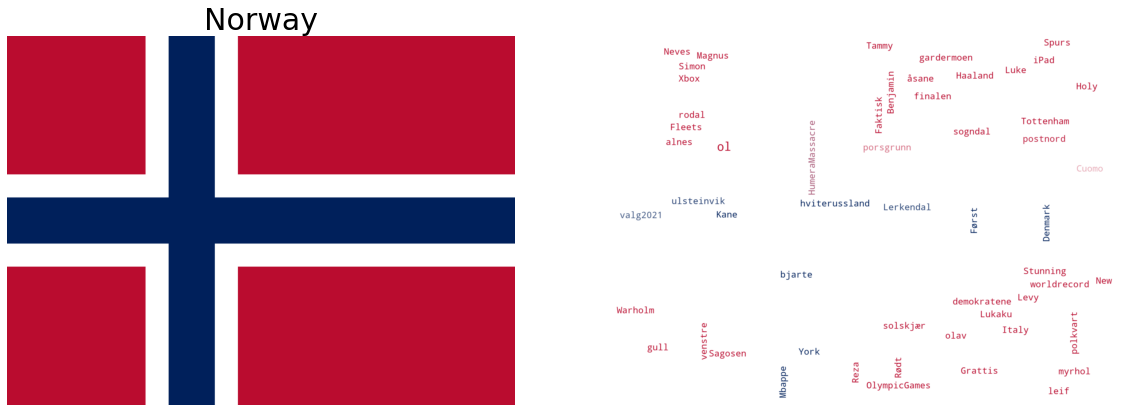

In [80]:
showTrendingTweetsInCountry('Norway', api)

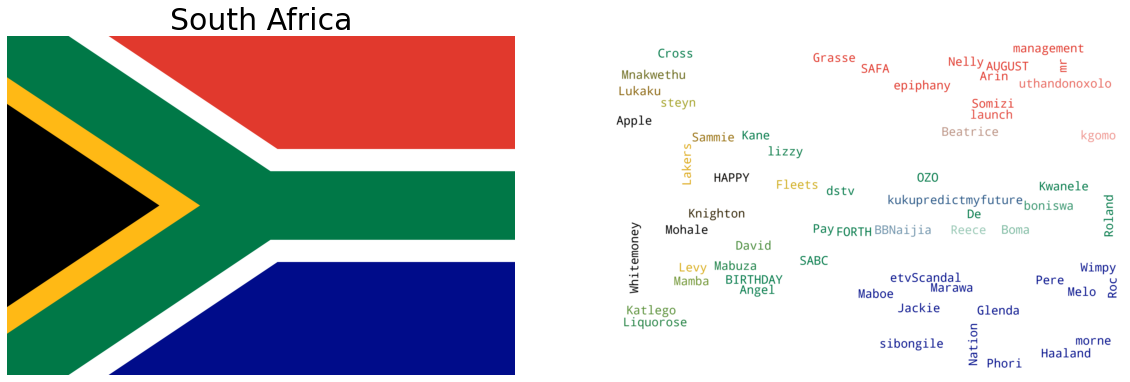

In [81]:
showTrendingTweetsInCountry('South Africa', api)

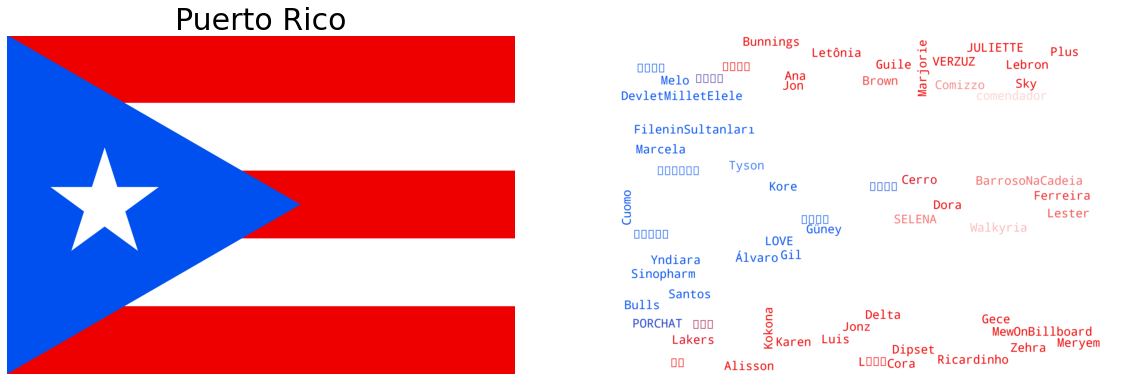

In [82]:
showTrendingTweetsInCountry('Puerto Rico', api)

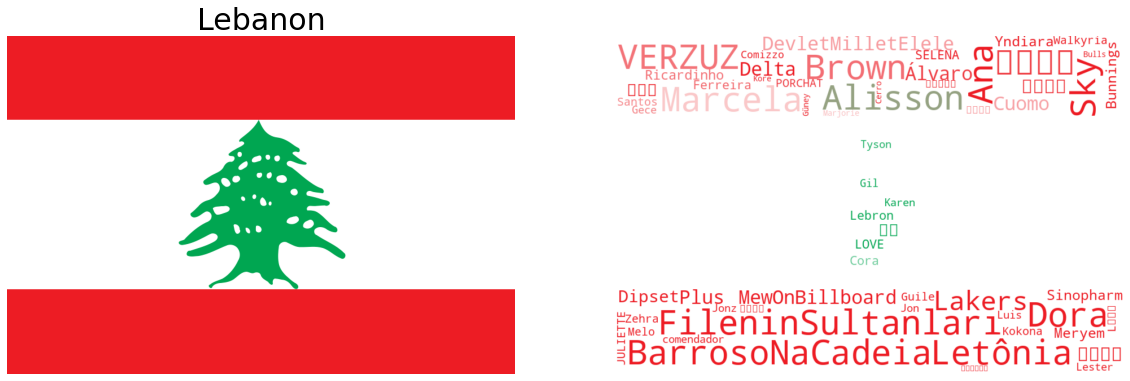

In [83]:
showTrendingTweetsInCountry('Lebanon', api)

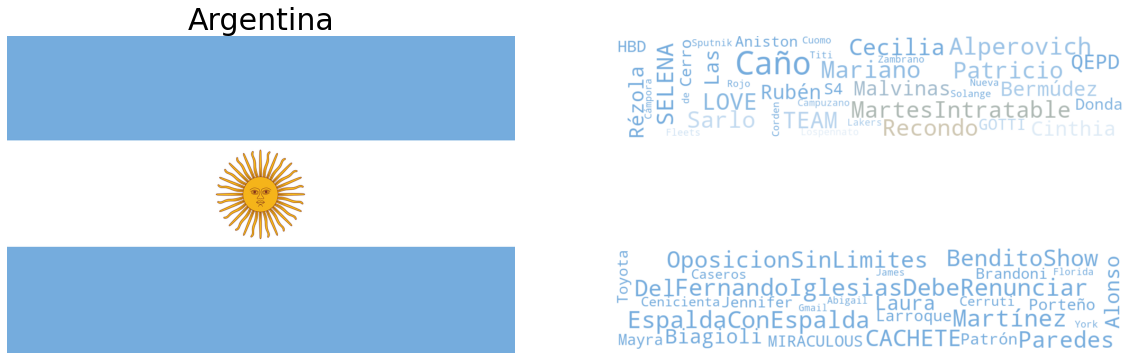

In [84]:
showTrendingTweetsInCountry('Argentina', api)

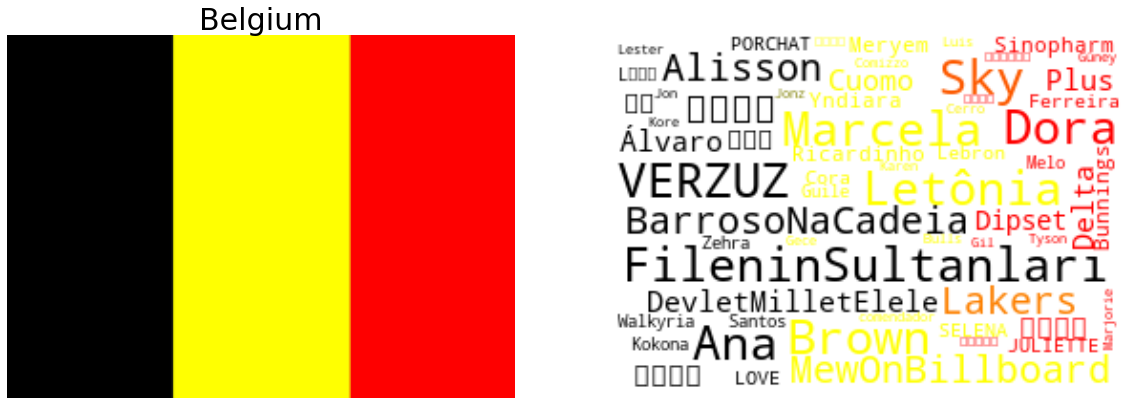

In [85]:
showTrendingTweetsInCountry('Belgium', api)

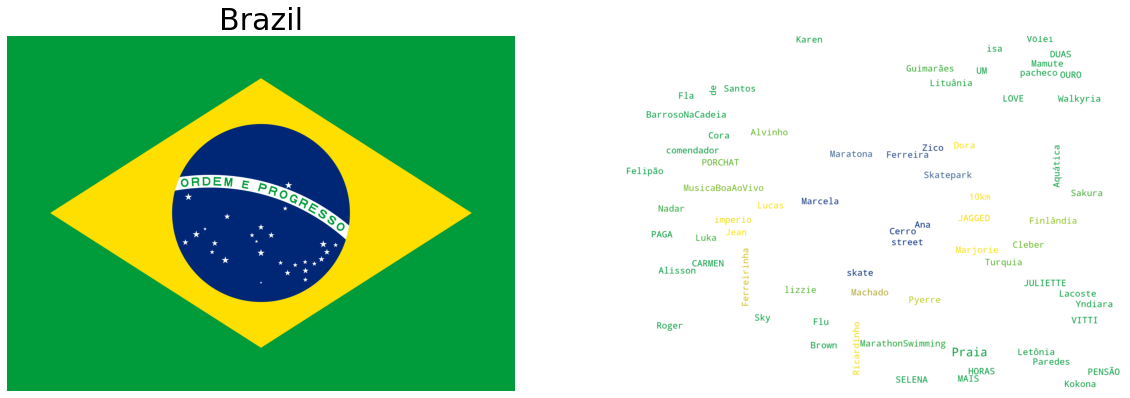

In [86]:
showTrendingTweetsInCountry('Brazil', api)

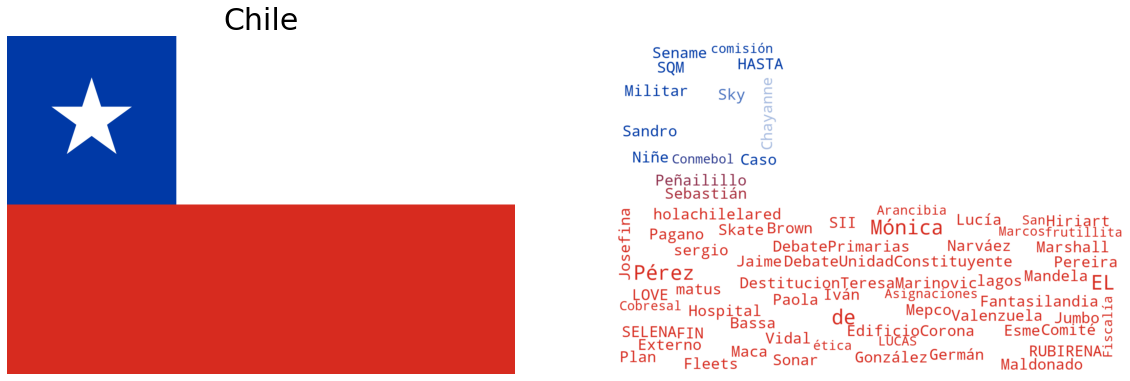

In [87]:
showTrendingTweetsInCountry('Chile', api)

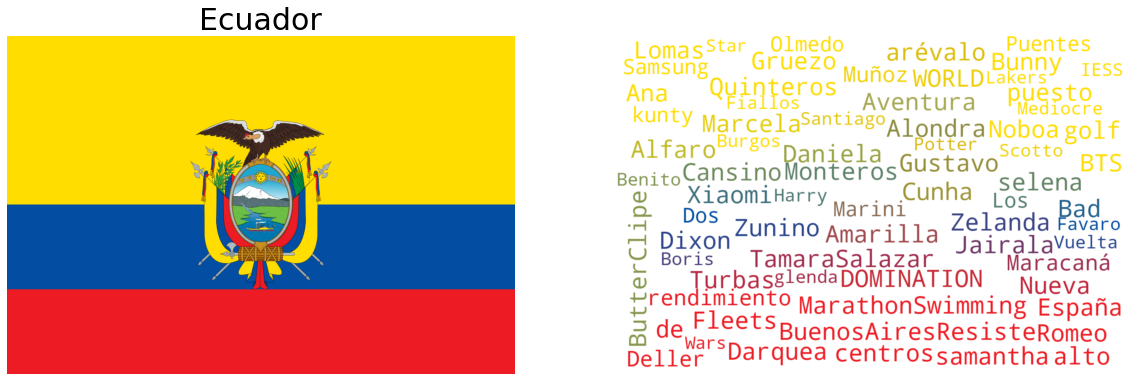

In [88]:
showTrendingTweetsInCountry('Ecuador', api)

In [89]:
!zip -r savedImages.zip savedImages

  adding: savedImages/ (stored 0%)
  adding: savedImages/Chile-Trending-Topics.png (deflated 6%)
  adding: savedImages/South Africa-Trending-Topics.png (deflated 5%)
  adding: savedImages/Norway-Trending-Topics.png (deflated 11%)
  adding: savedImages/Spain-Trending-Topics.png (deflated 6%)
  adding: savedImages/Greece-Trending-Topics.png (deflated 9%)
  adding: savedImages/Argentina-Trending-Topics.png (deflated 6%)
  adding: savedImages/Mexico-Trending-Topics.png (deflated 5%)
  adding: savedImages/Netherlands-Trending-Topics.png (deflated 5%)
  adding: savedImages/Lebanon-Trending-Topics.png (deflated 5%)
  adding: savedImages/Ecuador-Trending-Topics.png (deflated 3%)
  adding: savedImages/France-Trending-Topics.png (deflated 5%)
  adding: savedImages/Germany-Trending-Topics.png (deflated 5%)
  adding: savedImages/Ireland-Trending-Topics.png (deflated 6%)
  adding: savedImages/United States-Trending-Topics.png (deflated 7%)
  adding: savedImages/Jordan-Trending-Topics.png (deflated 